# Petrol Price Prediction

Importing Libaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection and Processing

In [2]:
# Loading data from a csv
usd_pkr = pd.read_csv('Datasets/PKR _ US$ Exchange Rates.csv')
petrol_price = pd.read_csv('Datasets/Petrol Price.csv')

In [3]:
# Petrol Price
petrol_price.head()

,Weekly,Islamabad,Rawalpindi,Gujranwala,Sialkot,Lahore,Faisalabad,Sargodha,Multan,Bahawalpur,Karachi,Hyderabad,Sukkur,Larkana,Peshawar,Bannu,Quetta,Khuzdar,Pakistan
0,26-Jul-2023,253.73,253.73,253.8,253.91,253.74,253.7,253.98,253.76,254.25,253.74,254.88,253.8,254.03,253.80,255.2,253.6,253.75,253.96
1,20-Jul-2023,253.73,253.73,253.8,253.91,253.74,253.7,253.98,253.76,254.25,253.74,254.88,253.8,254.03,253.80,255.2,253.6,253.75,253.96
2,13-Jul-2023,262.75,262.76,262.8,262.90,262.78,262.7,262.98,262.79,263.23,262.74,263.87,262.8,263.10,262.75,262.8,262.6,262.79,262.89
3,06-Jul-2023,262.75,262.76,262.8,262.90,262.78,262.7,262.98,262.79,263.23,262.74,263.87,262.8,263.10,262.75,262.8,262.6,262.79,262.89
4,22-Jun-2023,262.75,262.76,262.8,262.90,262.78,262.7,262.98,262.79,263.23,262.74,263.87,262.8,263.10,262.75,262.8,262.6,262.79,262.89


In [4]:
# USD - PKR
usd_pkr.head()

,Date,US$
0,03-Aug-2023,287.2019
1,02-Aug-2023,289.3818
2,01-Aug-2023,287.5424
3,31-Jul-2023,286.6416
4,27-Jul-2023,286.4521


In [ ]:
# Merging datasets with required values
# Fixing the date problem
usd_pkr["Date"] = pd.to_datetime(usd_pkr['Date'])
petrol_price['Weekly'] = pd.to_datetime(petrol_price['Weekly'])

usd_pkr["Petrol_Price"] = usd_pkr["Date"].apply(lambda date: petrol_price.loc[petrol_price["Weekly"].sub(date).abs().idxmin(), "Karachi"])
usd_pkr['Petrol_Price'][:3] = 273.95

petrol_price_pred = pd.DataFrame(usd_pkr)

In [6]:
# Merged Data Frame
petrol_price_pred.head()

,Date,US$,Petrol_Price
0,2023-08-03,287.2019,273.95
1,2023-08-02,289.3818,273.95
2,2023-08-01,287.5424,273.95
3,2023-07-31,286.6416,253.74
4,2023-07-27,286.4521,253.74


In [7]:
# Checking the info
petrol_price_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1979 entries, 0 to 1978
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          1979 non-null   datetime64[ns]
 1   US$           1979 non-null   float64       
 2   Petrol_Price  1979 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 46.5 KB


In [8]:
# Checking missing values
petrol_price_pred.isnull().sum()

Date            0
US$             0
Petrol_Price    0
dtype: int64

In [9]:
# Checking the statistics
petrol_price_pred.describe()

,Date,US$,Petrol_Price
count,1979,1979.000000,1979.000000
mean,2019-07-15 03:05:32.895401728,151.339956,116.960045
min,2015-07-02 00:00:00,101.702500,64.480000
25%,2017-07-08 12:00:00,105.397800,74.940000
50%,2019-07-15 00:00:00,153.331800,99.360000
75%,2021-07-24 12:00:00,167.347050,118.590000
max,2023-08-03 00:00:00,298.931800,282.790000
std,NaN,48.684358,57.800388


Correlation

1.   Positive Correlation
2.   Negative Correlation



<Axes: >

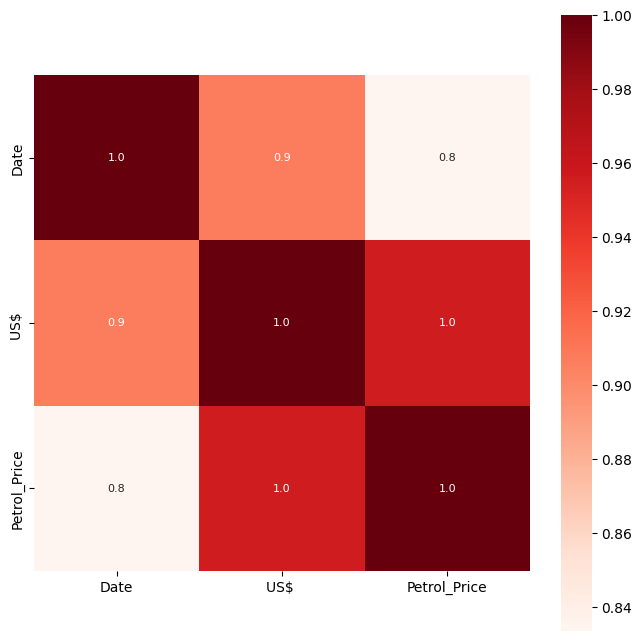

In [20]:
# Finding the correlation
correlation = petrol_price_pred.corr()

# constructing heatmap
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Reds')

In [11]:
# Correlation Values of Petrol
print(correlation['Petrol_Price'])

Date            0.833385
US$             0.955785
Petrol_Price    1.000000
Name: Petrol_Price, dtype: float64


In [ ]:
# Checking the distribution
sns.distplot(petrol_price_pred['Petrol_Price'], color='Red')

Splitting the Features and Targets

In [13]:
X = petrol_price_pred.drop(['Date', 'Petrol_Price'], axis=1)
Y = petrol_price_pred['Petrol_Price']

print(X, Y)

          US$ 
0     287.2019
1     289.3818
2     287.5424
3     286.6416
4     286.4521
...        ...
1974  101.7589
1975  101.7809
1976  101.7910
1977  101.7474
1978  101.7587

[1979 rows x 1 columns] 0       273.95
1       273.95
2       273.95
3       253.74
4       253.74
         ...  
1974     78.06
1975     78.06
1976     78.06
1977     78.06
1978     78.06
Name: Petrol_Price, Length: 1979, dtype: float64


Splitting into training and test data

In [14]:
# Training Data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Model Training
regressor = RandomForestRegressor(n_estimators=100)
regressor.fit(X_train, Y_train)

RandomForestRegressor()

Model Evaluation

In [15]:
# Prediction on test data
test_data_pred = regressor.predict(X_test)
test_data_pred

array([ 71.3792    , 116.066     ,  65.9626    , 113.76      ,
       116.2152    , 110.5399    ,  88.428     , 113.5244    ,
        76.4273    ,  71.59      ,  99.3031    , 123.79      ,
        65.7508    ,  70.3067    , 115.022     , 110.9835    ,
        72.57      ,  74.8009    ,  74.5713    , 112.9002    ,
        76.48407833,  99.67      , 155.2564    , 114.2846    ,
        69.66925671,  76.1673    , 110.713     ,  87.06333333,
        76.45120476,  76.3515    , 112.1335    ,  65.58136   ,
        93.4628    ,  77.4358    ,  91.69      , 116.3792    ,
       150.36      , 100.2168    , 110.2362    ,  92.9094    ,
        77.89      , 272.75      ,  73.0849    ,  94.7113    ,
        71.2676    , 112.5553    ,  87.9372    , 113.9677    ,
        71.2568    , 270.257     , 127.79      ,  95.6559    ,
        76.5901    ,  72.1147    ,  70.4828    , 272.75      ,
        84.6618    ,  73.2525    , 100.5714    , 104.0959    ,
        87.8922    , 112.6859    ,  88.1232    , 141.62

In [16]:
# R-squared Error
error_score = metrics.r2_score(Y_test, test_data_pred)
print('R-squared error: ', error_score)

R-squared error:  0.9783003876788409


Comparing the actual values with predicted values in a Plot

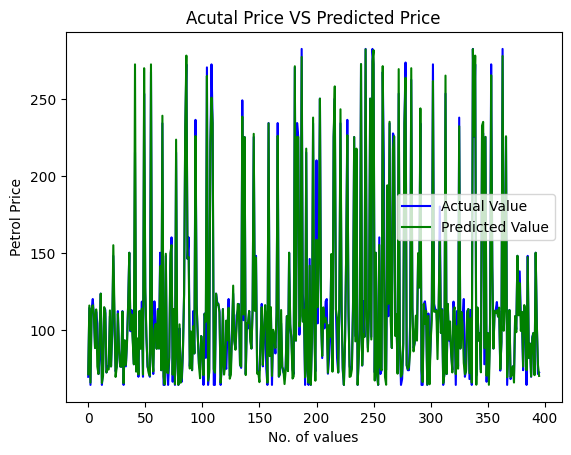

In [19]:
# Converting to a list
Y_test = list(Y_test)

# Time to plot
plt.plot(Y_test, color='Blue', label='Actual Value')
plt.plot(test_data_pred, color='Green', label='Predicted Value')
plt.title('Acutal Price VS Predicted Price')
plt.xlabel('No. of values')
plt.ylabel('Petrol Price')
plt.legend()
plt.show()